In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
df = pd.read_csv('archive.zip')
df

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,AI14996,Robotics Engineer,38604,USD,EN,FL,Finland,S,Finland,50,"Java, Kubernetes, Azure",Bachelor,1,Energy,2025-02-06,2025-03-25,1635,7.9,Advanced Robotics
14996,AI14997,Machine Learning Researcher,57811,GBP,EN,CT,United Kingdom,M,United Kingdom,0,"Mathematics, Docker, SQL, Deep Learning",Master,0,Government,2024-10-16,2024-10-30,1624,8.2,Smart Analytics
14997,AI14998,NLP Engineer,189490,USD,EX,CT,South Korea,L,South Korea,50,"Scala, Spark, NLP",Associate,17,Manufacturing,2024-03-19,2024-05-02,1336,7.4,AI Innovations
14998,AI14999,Head of AI,79461,EUR,EN,FT,Netherlands,M,Netherlands,0,"Java, Computer Vision, Python, TensorFlow",PhD,1,Real Estate,2024-03-22,2024-04-23,1935,5.6,Smart Analytics


 # 1. Descriptive statistics

### Main statistic

In [ ]:
df.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


### Outliers

In [ ]:
numeric_cols = df.select_dtypes(include="number").columns
colors = px.colors.qualitative.Set3

for i, col in enumerate(numeric_cols):
    color = colors[i % len(colors)]
    fig = px.box(df, y=col, title=f"Boxplot for {col}")
    fig.update_traces(marker_color=color, line_color=color)
    fig.show()

### Non null values check

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

# 2. Data visualisation

In [ ]:
def agg_n_show(by, col):
    group_jop_by_salary = df.groupby(by, as_index=False).agg({col: 'mean'}).sort_values(col, ascending=False)
    fig = px.bar(group_jop_by_salary, x=by, y=col, color=col)
    fig.show()

In [ ]:
agg_n_show('job_title', 'salary_usd')
agg_n_show('experience_level', 'salary_usd')
agg_n_show('company_size', 'salary_usd')

In [ ]:
df['posting_date'] = pd.to_datetime(df['posting_date'])

In [ ]:
fig = px.scatter(df[(df['posting_date'].dt.year == 2025) & (df["company_location"] == 'Germany')],
                 x="salary_usd",size="salary_usd",
                 y="benefits_score",
                 color="salary_usd",
                 hover_name="company_location", log_x=True, size_max=60)
fig.show()

In [ ]:
fig = px.pie(df, values='salary_usd', names='company_location', title='Salary in countries')
fig.show()

In [ ]:
fig = px.treemap(df, path=["company_location", "job_title"], values='salary_usd',
                  color='salary_usd', hover_data=["company_location"])
fig.show()

In [8]:
fig = px.histogram(df, x="salary_usd", y="job_title", color="industry",
                   hover_data=df.columns)
fig.show()

### Correlation matrix

<Axes: >

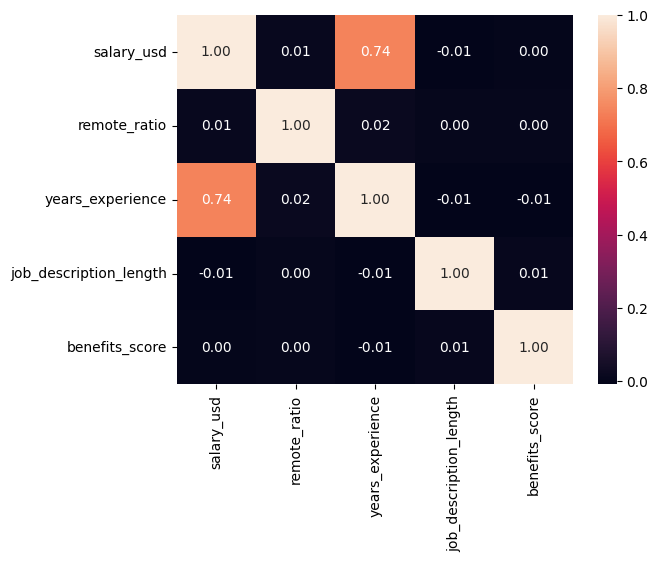

In [ ]:
df_corr= df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True, fmt='.2f')